# Movie Recommendation System

In [1]:
import pandas as pd

data = pd.read_csv("gs://netflix1/netflix1.csv", sep=',', names=['movie', 'user','rating','date'] )

print( data.shape )

data.head(10)

(26977631, 4)


,movie,user,rating,date
0,1,1488844,3,2005-09-06
1,1,822109,5,2005-05-13
2,1,885013,4,2005-10-19
3,1,30878,4,2005-12-26
4,1,823519,3,2004-05-03
5,1,893988,3,2005-11-17
6,1,124105,4,2004-08-05
7,1,1248029,3,2004-04-22
8,1,1842128,4,2004-05-09
9,1,2238063,3,2005-05-11


In [2]:
data.date = pd.to_datetime( data.date )

data.sort_values( by='date', inplace=True )

data.head()

,movie,user,rating,date
24047887,8651,510180,2,1999-11-11
25919385,9003,510180,3,1999-11-11
6830242,5625,510180,4,1999-11-11
22463165,8357,510180,4,1999-11-11
6465153,5571,510180,4,1999-11-11


### Checking for Null and duplicate values

In [3]:
sum( data.isnull().any() )

0

In [4]:
# DataFrame.duplicated( subset=None, keep='first' )

sum( data.duplicated( ['movie','user','rating'] ) )

# duplicated : Return boolean Series denoting duplicate rows, optionally only considering certain columns.
# subset : column label or sequence of labels, optional
# Only consider certain columns for identifying duplicates, by default use all of the columns

# keep : {‘first’, ‘last’, False}, default ‘first’
# first : Mark duplicates as True except for the first occurrence.
# last : Mark duplicates as True except for the last occurrence.
# False : Mark all duplicates as True.

0

In [5]:
import numpy as np

print("Total no of Ratings : ", data.shape[0])
print("Total No of Users   : ", len( np.unique(data.user) ))
print("Total No of Movies  : ", len( np.unique(data.movie) ))

Total no of Ratings :  26977631
Total No of Users   :  474062
Total No of Movies  :  4712


### Splitting data into Test And Train

In [6]:
data.iloc[0] 

# Purely integer-location based indexing for selection by position.
# .iloc[] is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array.

movie                    8651
user                   510180
rating                      2
date      1999-11-11 00:00:00
Name: 24047887, dtype: object

In [5]:
train = data.iloc[ : int( data.shape[0]*0.80 ) ]

test = data.iloc[ int( data.shape[0]*0.80 ) :  ]

In [9]:
print( train.shape )
print( test.shape )

(21582104, 4)
(5395527, 4)


In [9]:
import numpy as np

print("Total no of Ratings in Train data : ", train.shape[0])
print("Total No of Users in Train data   : ", len( np.unique(train.user) ))
print("Total No of Movies in Train data  : ", len( np.unique(train.movie) ))

print("\nTotal no of Ratings in Test data : ", test.shape[0])
print("Total No of Users in Test data   : ", len( np.unique(test.user) ))
print("Total No of Movies in Test data  : ", len( np.unique(test.movie) ))

Total no of Ratings in Train data :  21582104
Total No of Users in Train data   :  393931
Total No of Movies in Train data  :  4606

Total no of Ratings in Test data :  5395527
Total No of Users in Test data   :  302567
Total No of Movies in Test data  :  4707


In [10]:
train.rating.value_counts()

4    7306096
3    6335913
5    4643094
2    2281822
1    1015179
Name: rating, dtype: int64

## Data Analysis

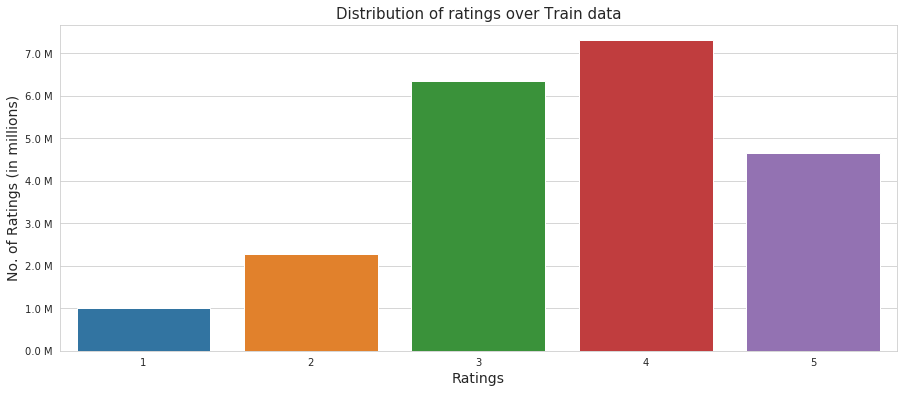

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

fig, ax = plt.subplots( figsize = (15,6) )
sns.countplot( train.rating )

# Converting values like 2,500,000 to 2.5 M to readability
y = [ str(item/10**6) + " M" for item in ax.get_yticks() ]
ax.set_yticklabels( y )

ax.set_ylabel('No. of Ratings (in millions)',size=14)
ax.set_xlabel('Ratings',size=14)
plt.title('Distribution of ratings over Train data',size=15)

plt.show()

In [13]:
print( train.resample('m', on='date') )

print( train.resample('m', on='date')['rating'] )

print( train.resample('m', on='date')['rating'].count()[:10] )

# Resample time-series data. Convenience method for frequency conversion and resampling of time series. 
# Object must have a datetime-like index (DatetimeIndex, PeriodIndex, or TimedeltaIndex), or pass datetime-like values...
# ... to the on or level keyword.


DatetimeIndexResampler [freq=<MonthEnd>, axis=0, closed=right, label=right, convention=start, base=0]
date
1999-11-30        7
1999-12-31      650
2000-01-31    26144
2000-02-29    27589
2000-03-31    24753
2000-04-30    18220
2000-05-31    16079
2000-06-30    14468
2000-07-31    16952
2000-08-31    20629
Freq: M, Name: rating, dtype: int64


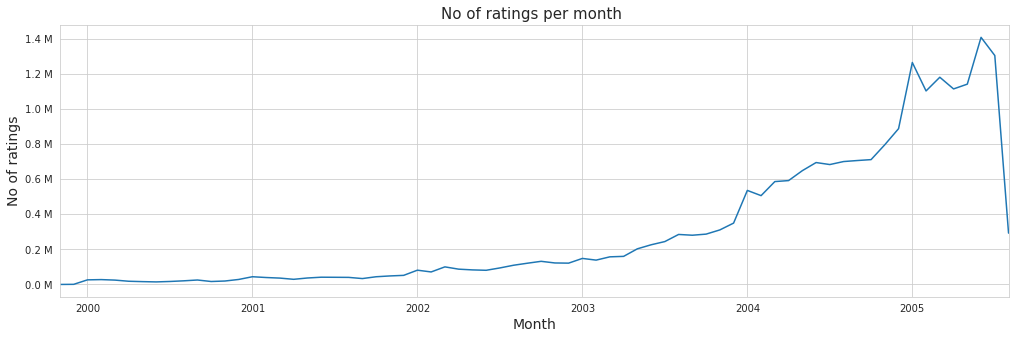

In [14]:
plt.figure( figsize = (17,5) )

ax = train.resample('m', on='date')['rating'].count().plot()

y = [ str(item/10**6) + " M" for item in ax.get_yticks() ]  
ax.set_yticklabels( y )

ax.set_title('No of ratings per month ', size=15)
plt.xlabel('Month', size=14)
plt.ylabel('No of ratings', size=14)

plt.show()

In [15]:
# Rated Movie per User

rateMPU = train.groupby( by='user' )['rating'].count().sort_values()

print( rateMPU.head(2) )
print( rateMPU.tail(2))

user
510347     1
2444947    1
Name: rating, dtype: int64
user
2439493    4165
305344     4545
Name: rating, dtype: int64


In [16]:
rateMPU.describe()

count    393931.000000
mean         54.786508
std          79.908893
min           1.000000
25%           9.000000
50%          25.000000
75%          68.000000
max        4545.000000
Name: rating, dtype: float64

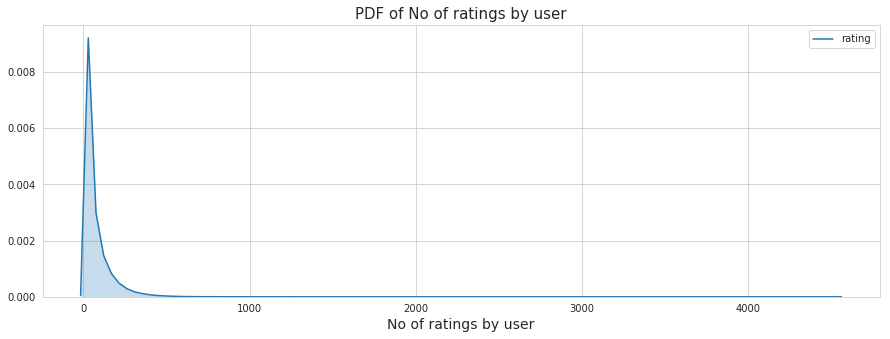

In [17]:
plt.figure( figsize = (15,5) )

sns.kdeplot( rateMPU, shade=True )
plt.xlabel('No of ratings by user', size=14)
plt.title("PDF of No of ratings by user", size=15)

plt.show()

In [18]:
quant = rateMPU.quantile( np.arange(0,1.01,0.01), interpolation='higher' )


print( quant.head(), '\n' )
print( quant.tail(10) )

# interpolation : {‘linear’, ‘lower’, ‘higher’, ‘midpoint’, ‘nearest’} 
# This parameter specifies the interpolation method to use, when the desired quantile lies between two data points i and j
# lower: i.      higher: j.       nearest: i or j whichever is nearest.      midpoint: (i + j) / 2.

# Ref : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html

0.00    1
0.01    1
0.02    1
0.03    2
0.04    2
Name: rating, dtype: int64 

0.91     153
0.92     163
0.93     175
0.94     190
0.95     207
0.96     229
0.97     258
0.98     298
0.99     370
1.00    4545
Name: rating, dtype: int64


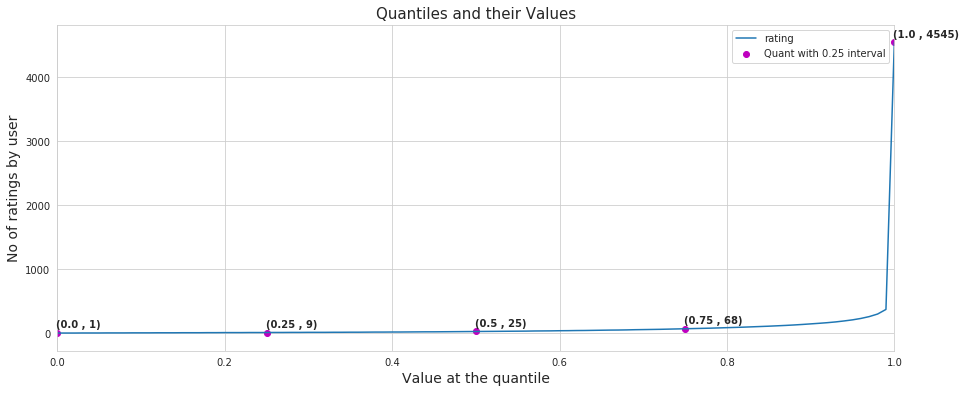

In [20]:
#plt.figure( figsize = (15,5) )

quant.plot(figsize = (15,6) )

# Quantiles with 0.25 difference

plt.scatter( x=quant.index[::25], y=quant.values[::25], c='m', label = "Quant with 0.25 interval")

plt.title("Quantiles and their Values", size=15)
plt.ylabel('No of ratings by user', size=14)
plt.xlabel('Value at the quantile', size=14)

plt.legend(loc='best')

# Annotate the 25th, 50th, 75th and 100th percentile values....

for x, y in zip( quant.index[::25], quant[::25] ):
    plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.001, y+80) ,fontweight='bold')

plt.show()

In [21]:
rateM = train.groupby( by='movie' )['rating'].count().sort_values()

print( rateM.head(2), '\n' )
print( rateM.tail(10) )

movie
6725    1
8323    1
Name: rating, dtype: int64 

movie
4656    112924
8644    116290
6206    119352
6972    123348
8782    123753
5496    125198
7624    126362
6037    130019
6287    155371
5317    179130
Name: rating, dtype: int64


In [22]:
rateM.describe()

count      4606.000000
mean       4685.650022
std       13575.682729
min           1.000000
25%         143.000000
50%         435.000000
75%        2345.500000
max      179130.000000
Name: rating, dtype: float64

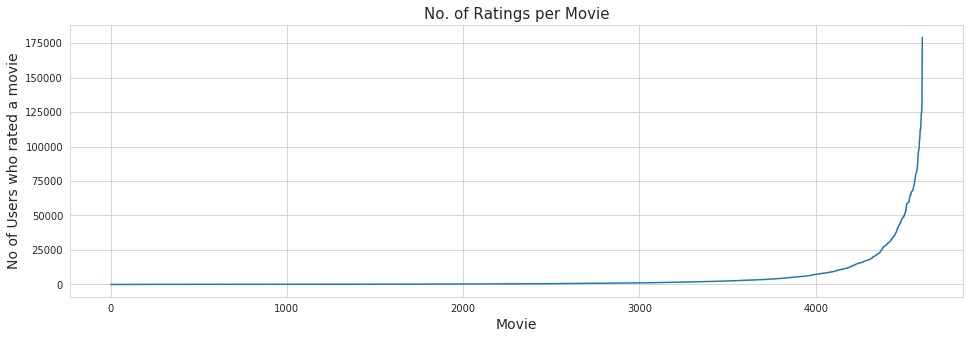

In [23]:
plt.figure(figsize=(16,5))

plt.plot( rateM.values )

plt.title('No. of Ratings per Movie', size=15)
plt.xlabel('Movie', size=14)
plt.ylabel('No of Users who rated a movie', size=14)

plt.show()

## Creating Sparse Matrix

In [6]:
from scipy import sparse
from scipy.sparse import csr_matrix

trSparse = sparse.csr_matrix(( train.rating.values, (train.user.values, train.movie.values)), )

# Here Rating values are the cells, Movie ID is column, User ID is row

print(' Original shape     : ', train.shape )
print(' Shape after sparse : ', trSparse.shape )

# csr_matrix : This can be instantiated in several ways:
# One way is -> csr_matrix((data, (row_ind, col_ind)),     [shape=(M, N)])
# where data, row_ind and col_ind satisfy the relationship a[row_ind[k], col_ind[k]] = data[k].

 Original shape     :  (21582104, 4)
 Shape after sparse :  (2649430, 9211)


In [7]:
spar = trSparse.count_nonzero() / ( trSparse.shape[0] * trSparse.shape[1] )

print(' Sparsity of Train Sparse Matrix : ', spar)

# The sparsity of a matrix can be quantified with a score,
# Which is the number of zero values in the matrix divided by the total number of elements in the matrix

 Sparsity of Train Sparse Matrix :  0.0008843711144030339


In [8]:
teSparse = sparse.csr_matrix(( test.rating.values, (test.user.values, test.movie.values)), )

# Here Rating values are the cells, Movie ID is column, User ID is row

print(' Original shape     : ', test.shape )
print(' Shape after sparse : ', teSparse.shape )


 Original shape     :  (5395527, 4)
 Shape after sparse :  (2649430, 9211)


In [9]:
spar = teSparse.count_nonzero() / ( teSparse.shape[0] * teSparse.shape[1] )

print(' Sparsity of Test Sparse Matrix : ', spar)

 Sparsity of Test Sparse Matrix :  0.0002210928195778159


## Avg. user and movie ratings

In [10]:
# Finding Global Average of Movie Ratings

trainAvg = dict( )

gAvg = trSparse.sum() / trSparse.count_nonzero()

trainAvg['global'] = gAvg
trainAvg

{'global': 3.5689947560256403}

In [11]:
# Understanding .A1
import numpy as np

x = np.matrix(np.arange(12).reshape((3,4)))
print(x,'\n')

print(x.A1, '\n')

print(x.sum(axis=0))

print(x.sum(axis=0).A1)

# matrix.A1 : Return self as a flattened ndarray. Equivalent to np.asarray(x).ravel()

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] 

[ 0  1  2  3  4  5  6  7  8  9 10 11] 

[[12 15 18 21]]
[12 15 18 21]


In [12]:
# avg() : returns user avg. in dictionary (key: userID/movieID, value: avg. rating)

# matrix : Sparse Matrix
# axis: 1 - User axes,  0 - Movie axes

def avg( matrix, axis ):
        
    sumR = matrix.sum(axis=axis).A1  # Sum of ratings
    
    rated = matrix != 0  
    # bool matrix of ratings ( whether a user rated that movie or not )
    
    nR = rated.sum(axis=axis).A1  # no. of ratings
    
    r, c = matrix.shape
    
    # If axis = 1 i,e: users do -> for i in range(r)   else: for i in range(c)
    # If no. of rating is NOT 0 then put 'i' as key and Sum of rating divided by no. of rating as value
    
    avgR = { i : sumR[i] / nR[i]  for i in range(r if axis else c)  if nR[i] != 0 }
    # avgR : dictonary of users and their avg. rating
    
    # return that dictionary of average ratings
    return avgR

# matrix.A1 : Return self as a flattened ndarray. Equivalent to np.asarray(x).ravel()

In [13]:
# Avg. rating per user

trainAvg['user'] = avg( trSparse, 1 )

print( len(trainAvg['user']) )

trainAvg['user'][7]

# axis: 1 - User axes,  0 - Movie axes

393931


3.9382716049382718

In [14]:
# Avg. rating per movie

trainAvg['movie'] = avg( trSparse, 0 )

print( len(trainAvg['movie']) )

trainAvg['movie'][8194]

4606


3.888888888888889

In [17]:
# Getting the list of avg. user ratings 
userAvg = [ avg for avg in trainAvg['user'].values() ]

# Getting the list of avg. movie ratings
movieAvg = [ avg for avg in trainAvg['movie'].values() ]

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,5))

fig.suptitle('Avg. Ratings per User and per Movie', fontsize=15 )

ax1.set_title('Avg. User ratings', size=14)

sns.distplot( userAvg, ax=ax1, hist=False,  kde_kws=dict(cumulative=True), label='CDF' )
sns.distplot( userAvg, ax=ax1, hist=False, label='PDF' )


ax2.set_title('Avg. Movie ratings', size=14)

sns.distplot( movieAvg, ax=ax2, hist=False, kde_kws=dict(cumulative=True), label='CDF')
sns.distplot( movieAvg, ax=ax2, hist=False, label='PDF')

plt.show()

# {hist, kde, rug, fit}_kws  (dictionaries, optional) : Keyword arguments for underlying plotting functions.



<img src='pic.jpg'>

### Cold Start Problem

Different users subscribe streaming sites like Netflix, Hulu etc at differnt time based on their need and likings.

Since we split our dataset based on time (date) there may be some new users ( ones who subscribed later ) in our test dataset.

Since the split is Time based we don't have any data for those new users in our Train dataset.

Also there may be new movies for which we don't have any user reviews or ratings.

This leads to a Cold Start Problem.

In [46]:
# Cold Start problem with Users

users = len( np.unique(data.user) )
trUser = len( trainAvg['user'] )

newUser = users - trUser

print(' Total Users in both Train and Test : ', users)
print(' No. of Users in Train Dataset      : ', trUser)
print(' No. of new Users (not in Train)    : ', newUser)

print('\n % of new Users : ', np.round( (newUser/users) * 100, 2) )

 Total Users in both Train and Test :  474062
 No. of Users in Train Dataset      :  393931
 No. of new Users (not in Train)    :  80131

 % of new Users :  16.9


In [47]:
# Cold Start problem with Users

movie = len( np.unique(data.movie) )
trMovie = len( trainAvg['movie'] )

newMovie = movie - trMovie

print(' Total Movies in both Train and Test : ', movie)
print(' No. of Movies in Train Dataset      : ', trMovie)
print(' No. of new Movies (not in Train)    : ', newMovie)

print('\n % of new Movies : ', np.round( (newMovie/users) * 100, 2) )

 Total Movies in both Train and Test :  4712
 No. of Movies in Train Dataset      :  4606
 No. of new Movies (not in Train)    :  106

 % of new Movies :  0.02


## Similarity Matrix

### User-User Similarity
<br>
Calculating User User Similarity Matrix requires enormous amount of time (even with huge Computing Power) because of number of users are very large.

Even if we tried it by reducing dimensions it still takes substantial amount of time ( even days )

Also your system could crash or the program could stop with Memory Error.


In [13]:
from sklearn.metrics.pairwise import cosine_similarity
from datetime import datetime

start = datetime.now()


rows, cols, data = list(), list(), list()

r, c = trSparse.nonzero()

r = sorted( set(r) )

top = 100

for row in r[:top] :
        
        # get the similarity row for this user with all other users
        sim = cosine_similarity( trSparse.getrow(row), trSparse ).ravel()
        
        # We will get only the top 'top' most similar users and ignore rest of them.
        sind = sim.argsort()[ -top : ]
        sval = sim[ sind ]
        
        # Adding them to our rows, cols and data
        rows.extend( [row] * top )
        cols.extend( sind )
        data.extend( sval )
    
print(' Time Taken : ', datetime.now() - start )

 Time Taken :  0:02:26.533536


In [14]:
print( len(rows), len(cols), len(data) )

print( data[:5] )

10000 10000 10000
[0.4205126648654114, 0.42072687857575297, 0.42099475669432485, 0.4210315817357486, 0.421245235402381]


In [15]:
uuSim = sparse.csr_matrix( (data, (rows, cols) ), shape=(trSparse.shape[0], trSparse.shape[0]) )

uuSim.shape

(2649430, 2649430)

An alternative is to compute similar users for a particular user,  whenenver required (**ie., Run time**)

  - We maintain a binary Vector for users, which tells us whether we already computed or not..
  
    - If not : 
        - Compute top (let's just say, 1000) most similar users for this given user, and add this to our datastructure, so that we can just access it(similar users) without recomputing it again.
        <br>
        <br>
    - If It is already Computed:
        - Just get it directly from our datastructure, which has that information.
        - In production time, We might have to recompute similarities, if it is computed a long time ago. Because user preferences changes over time. If we could maintain some kind of Timer, which when expires, we have to update it ( recompute it ). 
        
        
 - Which datastructure to use:
      - It is purely implementation dependant. 
      - One simple method is to maintain a **Dictionary Of Dictionaries**.
           - **key    :** _userid_ 
           - __value__: _Again a dictionary_
               - __key__  : _Similar User_
               - __value__: _Similarity Value_

### Movie Movie Similarity

In [16]:
start = datetime.now()

mmSim = cosine_similarity( X = trSparse.T, dense_output=False )

print( mmSim.shape )

print(' Time Taken : ', datetime.now() - start )

(9211, 9211)
 Time Taken :  0:00:30.887744


In [17]:
# We take only those top similar movie ratings and store them in a saperate dictionary.

print( mmSim.nonzero()[1] )

movieIds = np.unique( mmSim.nonzero()[1] )

print( movieIds.shape )

[7809 7641 6871 ... 4628 4577 4563]
(4606,)


In [18]:
print( mmSim[1726].toarray().ravel().argsort()[::-1][1:].shape )
mmSim[1726].toarray().ravel().argsort()[::-1][1:]

(9210,)


array([3067, 3073, 3072, ..., 6148, 6149,    0])

In [19]:
simMovie = dict()

for movie in movieIds :
    
    similar = mmSim[movie].toarray().ravel().argsort()[::-1][1:]
    
    simMovie[movie] = similar[:100]

In [20]:
print( simMovie[8196].shape )
simMovie[8196]

(100,)


array([8937, 6734, 6980, 4967, 9167, 8802, 5439, 5058, 8866, 8002, 6414,
       7506, 5918, 5411, 5249, 8234, 6809, 6992, 8779, 5757, 5449, 5424,
       4860, 4901, 7945, 4940, 8475, 6376, 5795, 7285, 5398, 8501, 8649,
       6954, 8759, 6360, 4571, 5784, 5099, 7335, 7120, 4941, 4903, 8588,
       5719, 5752, 6242, 8285, 6517, 5726, 8459, 6058, 6088, 7687, 5205,
       4510, 9117, 4811, 5780, 9083, 6412, 6897, 5484, 7033, 5779, 9163,
       7856, 8145, 5964, 4762, 8265, 6059, 5098, 6581, 5881, 4540, 7842,
       5037, 5720, 6426, 8323, 5452, 5500, 7328, 7068, 7407, 8303, 8849,
       7666, 9181, 8816, 5860, 6200, 7795, 9002, 6745, 8221, 6865, 5548,
       5146])

In [22]:
# Loading Movie Titles to check wether Similarity really works as the way we expected

titles = pd.read_csv("gs://netflix1/movie_titles.csv", sep=',', header=None,
                     names=['movieID', 'year', 'title'],
                     index_col = 'movieID', encoding = "ISO-8859-1")

titles.head(10)

,year,title
movieID,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
6,1997.0,Sick
7,1992.0,8 Man
8,2004.0,What the #$*! Do We Know!?
9,1991.0,Class of Nuke 'Em High 2


In [23]:
id = 1

trSparse[ : ,id].getnnz()

# getnnz() : Number of stored values, including explicit zeros.

30

In [24]:
id = 1

print(" Title of the Movie   : ",titles.loc[id].values[1] )

print(" Ratings from users   : ", trSparse[ : ,id].getnnz() )

print(" Similar Movies (top) : ", mmSim[ : ,id].getnnz() )

 Title of the Movie   :  Dinosaur Planet
 Ratings from users   :  30
 Similar Movies (top) :  2860


In [25]:
similarity = mmSim[ id ].toarray().ravel()

simInd = similarity.argsort()[ ::-1 ][ 1: ]

similarity[ simInd ]

# It will sort and reverse the array and ignore its similarity (ie.,1) and return its indices(movieID)

array([0.09725985, 0.08202692, 0.07884165, ..., 0.        , 0.        ,
       0.        ])

In [26]:
titles.loc[ simInd[:10] ]

,year,title
movieID,,
8800,2003.0,Prehistoric America: A Journey Through the Ice...
5302,2003.0,Chased by Dinosaurs: Three Walking with Dinosa...
6781,1949.0,Candid Camera: 5 Decades of Smiles
7301,1961.0,The Best of Mr. Peabody & Sherman: Vol. 1
8921,2004.0,Steve-O: Gross Misconduct
6178,2001.0,Underwaterworld Trilogy: Deep Encouters / Ocea...
4618,2005.0,Queer Eye for the Straight Guy: Queer Eye for ...
5364,1998.0,Body Story
9157,1998.0,Fear Faith Revenge 303


## Sampling data

In [ ]:
sparse.find( trSparse )

# find() : Return the indices and values of the nonzero elements of a matrix

In [61]:
# Understanding isin()

element = 2 * np.arange(4).reshape((2, 2))
print(element)

test_elements = [1, 2, 4, 8]

print(test_elements,'\n')
mask = np.isin(element, test_elements)

print(mask,'\n')

print(element[mask])

# isin() : Returns a boolean array of the same shape as element 
# That is True where an element of element is in test_elements and False otherwise.

# invert=True : Turns False -> True and true -> False

[[0 2]
 [4 6]]
[1, 2, 4, 8] 

[[False  True]
 [ True False]] 

[2 4]


In [27]:
import numpy as np

def sample( matrix, nuser, nmovie ):

    
    # Getting row, cols and ratings tuple from the matrix
    rind, cind, ratings = sparse.find( matrix )
    
    users = np.unique( rind )
    movies = np.unique( cind )

    print(" Original Matrix (users, movies) : ", len(users), len(movies) )
    print(" Original Matrix  Ratings        : ", len(ratings) )

    # Making sure to get same sample everytime we run this program and pick without replacement
    np.random.seed(15)  
    sampleUser = np.random.choice( users, nuser, replace=False )
    sampleMovie = np.random.choice( movies, nmovie, replace=False )
    
    mask = np.logical_and( np.isin(rind, sampleUser), np.isin(cind, sampleMovie) )
    
    # mask is a boolean array on original matrix  which has 'True' at those points for which there is unique id....
    # ... and that id is present in sampled data i,e; sampleUser ( same for col id and sampleMovie )
    
    sampleMatrix = sparse.csr_matrix( (ratings[mask], ( rind[mask], cind[mask] ) ),
                                     shape = ( max(sampleUser)+1, max(sampleMovie)+1 ) )

    print(" Sampled Matrix (users, movies) : ", len(sampleUser), len(sampleMovie) )
    print(" Sampled Matrix Ratings         : ", ratings[mask].shape[0] )

    return sampleMatrix

# np.random.choice : Generates a random sample from a given 1-D array

In [28]:
trSparse.shape

(2649430, 9211)

In [29]:
trSample = sample( trSparse, 17000, 2000 )

trSample.shape

 Original Matrix (users, movies) :  393931 4606
 Original Matrix  Ratings        :  21582104
 Sampled Matrix (users, movies) :  17000 2000
 Sampled Matrix Ratings         :  384957


(2649405, 9211)

In [30]:
teSparse.shape

(2649430, 9211)

In [31]:
teSample = sample( teSparse, 8000, 800 )

teSample.shape

 Original Matrix (users, movies) :  302567 4707
 Original Matrix  Ratings        :  5395527
 Sampled Matrix (users, movies) :  8000 800
 Sampled Matrix Ratings         :  24595


(2649232, 9206)

In [32]:
trSampleAvg = dict()

# Finding Global avg. of all movie ratings
gAvg = trSample.sum() / trSample.count_nonzero()

trSampleAvg['global'] = gAvg

trSampleAvg

{'global': 3.559719657000652}

In [33]:
# Finding Average rating per User

trSampleAvg['user'] = avg( trSample, 1 )

trSampleAvg['user'][1179656]

# avg( matrix, axis ): returns user avg. in dictionary (key: userID/movieID, value: avg. rating)
# matrix : Sparse Matrix,   axis: 1 - User axes,  0 - Movie axes

4.2727272727272725

In [34]:
# Finding Average rating per Movie

trSampleAvg['movie'] = avg( trSample, 0 )

trSampleAvg['movie'][8205]

1.5555555555555556

## Featurizing Data

In [34]:
trSU, trSM, trSR = sparse.find( trSample )

# Here, trSU : Train Smaple Users.     tsSM : Train sample Movies.

In [35]:
print(' Featurizing Train : Preparing for ', len(trSM), ' rows ' )

 Featurizing Train : Preparing for  384957  rows 


In [36]:
# Featurizing Train data

start = datetime.now()

with open('trFeat1.csv', mode='w') as trFeat:
    
    count = 0
    c1 = 0
    
    for ( user, movie, rating )  in zip( trSU, trSM, trSR ):
    
    
    # -- Ratings of a MOVIE by similar users of USER --------------------------------

        # Computing similar users
        userSim = cosine_similarity( trSample[user], trSample ).ravel()

        topSimUser = userSim.argsort()[::-1][1:] 
        # [1:]  : We ignore The Original (self) user from its similar users.

        # Getting the ratings of Top Similar users for this movie

        topR = trSample[ topSimUser, movie ].toarray().ravel()

        topSimUR = list( topR[ topR != 0 ][:5] )
        topSimUR.extend( [ trSampleAvg['movie'][movie] ] * ( 5 - len(topSimUR) ) )
        # we will make it's length "5" by adding user averages to.


    # -- Ratings by USER  to similar movies of MOVIE ----------------------------------

        # Computing the similar movies         
        movieSim = cosine_similarity( trSample[ : ,movie ].T, trSample.T ).ravel()

        topSimMovie = movieSim.argsort()[::-1][1:] 

        # Getting the ratings of Top Similar Movies rated by this user

        topR = trSample[ user, topSimMovie ].toarray().ravel()

        topSimMR = list( topR[ topR != 0 ][:5] )
        topSimMR.extend( [ trSampleAvg['user'][user] ] * ( 5 - len(topSimMR) ) ) 
        
        
    # -- Preparing to store data ---------------------------------------------------------
        
        row = list()
        row.append( user )
        row.append( movie )

        # Adding other features to this data

        # 1st feature
        row.append( trSampleAvg['global'] ) 

        # Next 5 features are similarUsers MOVIE ratings
        row.extend( topSimUR )

        # Next 5 features are USER ratings for similarMovies
        row.extend( topSimMR )

        # Avg. User Rating
        row.append( trSampleAvg['user'][user] )

        # Avg. Movie Rating
        row.append( trSampleAvg['movie'][movie] )

        # The actual Rating of this user-movie pair
        row.append( rating )

        count = count + 1

        # Adding rows to the file opened
        trFeat.write( ','.join( map(str, row) ))
        trFeat.write('\n')        

        # Just to display Progress
        if (count) % 5000 == 0:
            print( '<',count,'rows', datetime.now() - start, '>', end='           ')
            
            c1 += 1
            if c1 == 3:
                print('\n',end='')
                c1 = 0

print(' Total Time Taken : ', datetime.now() - start )

< 5000 rows 0:19:15.762668 >           < 10000 rows 0:38:24.423168 >           < 15000 rows 0:57:34.175769 >           
< 20000 rows 1:16:52.882351 >           < 25000 rows 1:36:10.752369 >           < 30000 rows 1:55:26.102627 >           
< 35000 rows 2:14:31.979153 >           < 40000 rows 2:33:42.203913 >           < 45000 rows 2:52:56.629285 >           
< 50000 rows 3:12:43.003749 >           < 55000 rows 3:32:31.816521 >           < 60000 rows 3:52:06.165977 >           
< 65000 rows 4:11:57.110102 >           < 70000 rows 4:32:14.234665 >           < 75000 rows 4:52:11.871170 >           
< 80000 rows 5:12:18.564396 >           < 85000 rows 5:32:09.270044 >           < 90000 rows 5:52:20.784563 >           
< 95000 rows 6:12:18.786355 >           < 100000 rows 6:32:34.128983 >           < 105000 rows 6:52:38.517547 >           
< 110000 rows 7:12:44.420887 >           < 115000 rows 7:33:04.710089 >           < 120000 rows 7:53:01.857808 >           
< 125000 rows 8:12:55.190679

<h3>Features Added :</h3>
    
- __GAvg__ : Average rating of all the ratings 


- __Similar users rating of this movie__:
    - 'ur1', 'ur2', 'ur3', 'ur4', 'ur5' ( Top 5 similar users who rated that movie )
    

- __Similar movies rated by this user__:
    - 'mr1', 'mr2', 'mr3', 'mr4', 'mr5' ( Top 5 similar movies rated by this movie )


- __Uavg__ : User's Average rating


- __Mavg__ : Average rating of this movie


- __rating__ : Rating of this movie by this user.


In [1]:
import pandas as pd

xtrain = pd.read_csv('trFeat.csv', names = ['user', 'movie', 'Gavg', 'ur1', 'ur2', 'ur3', 'ur4', 
                        'ur5','mr1', 'mr2', 'mr3', 'mr4', 'mr5', 'Uavg', 'Mavg', 'rating'], header=None )

print( xtrain.shape )
xtrain.head()

(384957, 16)


,user,movie,Gavg,ur1,ur2,ur3,ur4,ur5,mr1,mr2,mr3,mr4,mr5,Uavg,Mavg,rating
0,1248029,1,3.55972,3.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,5.0,3.0,3.254777,3.000000,3
1,209104,4501,3.55972,4.0,3.0,2.0,1.0,1.0,2.0,3.0,5.0,5.0,5.0,4.612903,2.904762,2
2,343411,4501,3.55972,1.0,4.0,5.0,4.0,1.0,5.0,5.0,5.0,3.0,5.0,4.625000,2.904762,5
3,368124,4501,3.55972,5.0,4.0,2.0,3.0,4.0,5.0,3.0,4.0,4.0,3.0,3.142857,2.904762,3
4,592691,4501,3.55972,3.0,2.0,3.0,3.0,1.0,5.0,5.0,3.0,1.0,2.0,3.415385,2.904762,4


In [35]:
# Getting users, movies and ratings from the Sampled Test 

teSU, teSM, teSR = sparse.find( teSample )

In [36]:
print(' Featurizing Test : Preparing for ', len(teSM), ' rows ' )

 Featurizing Test : Preparing for  24595  rows 


In [38]:
# Featurizing Test data

start = datetime.now()

with open('teFeat.csv', mode='w') as teFeat:
    count = 0 
    c1 = 0
    
    for (user, movie, rating)  in zip( teSU, teSM, teSR ):
        st = datetime.now()

    #  Ratings of MOVIE by similar users of USER ------------------------------------------------------
        #print(user, movie)
        try:
            # Computing similar Users of the "user"        
            userSim = cosine_similarity( trSample[user], trSample ).ravel()
            topSimU = userSim.argsort()[ ::-1 ][1:] 
            
            # Getting the ratings of most similar users for this movie
            topR = trSample[ topSimU, movie ].toarray().ravel()
            topSimUR = list( topR [topR != 0 ][:5] )
            # We make it's length "5" by adding movie averages
                
            topSimUR.extend([ trSampleAvg['movie'][movie] ]*( 5 - len(topSimUR) ))

        # -------- Cold Start Problem -----------
        # It can be a new User or new Movie or there are no ratings for given user for top similar movies
        except (IndexError, KeyError):
            
            topSimUR.extend( [ trSampleAvg['global'] ] * ( 5 - len(topSimUR) ))
            #print(top_sim_users_ratings)
        except:
            print(user, movie)
            raise



    # Ratings by USER  to similar movies of MOVIE ------------------------------------------------------
        try:
            # Computing similar movies of the MOVIE        
            movieSim = cosine_similarity( trSample[ :,movie].T, trSample.T ).ravel()
            topSimM = movieSim.argsort()[::-1][1:] 
            
            # Getting the ratings of most similar movie rated by this user.
            topR = trSample[ user, topSimM ].toarray().ravel()
            topSimMR = list( topR[ topR != 0 ][:5] )
            
            topSimMR.extend( [ trSampleAvg['user'][user] ] * ( 5 - len(topSimMR) )) 
        
        except (IndexError, KeyError):
            topSimMR.extend( [ trSampleAvg['global'] ] * ( 5 - len(topSimMR) ))
        except :
            raise

    # Storing Data to a .csv file -----------------------------------------------------
        row = list()
        # Adding user and movie name 
        row.append(user)
        row.append(movie)
       
        # First feature
        row.append( trSampleAvg['global'] ) 

        # Next 5 features are similar users MOVIE ratings
        row.extend( topSimUR )
        
        # Next 5 features are USER ratings for similar movies
        row.extend( topSimMR )
        
        # Avg_user rating
        try:
            row.append( trSampleAvg['user'][user] )
        except KeyError:
            row.append( trSampleAvg['global'] )
        except:
            raise
        
        # Avg_movie rating
        try:
            row.append( trSampleAvg['movie'][movie])
        except KeyError:
            row.append( trSampleAvg['global'])
        except:
            raise
        
        # The actual Rating of this user-movie pair.
        row.append(rating)
        
        # Adding rows to the file opened
        teFeat.write( ','.join( map(str, row) ))
        teFeat.write('\n')
        
        count += 1

               
        if (count) % 5000 == 0:
            print( '<',count,'rows', datetime.now() - start, '>', end='           ')
            
            c1 += 1
            if c1 == 3:
                print('\n',end='')
                c1 = 0

print(' Total Time Taken : ', datetime.now() - start )

< 5000 rows 0:20:14.560246 >           < 10000 rows 0:40:39.384196 >           < 15000 rows 1:01:08.332999 >           
< 20000 rows 1:21:29.563239 >            Total Time Taken :  1:40:12.510340


In [2]:
xtest = pd.read_csv('teFeat.csv', names = ['user', 'movie', 'Gavg', 'ur1', 'ur2', 'ur3', 'ur4', 
                        'ur5','mr1', 'mr2', 'mr3', 'mr4', 'mr5', 'Uavg', 'Mavg', 'rating'], header=None)

print( xtest.shape )
xtest.head()

(24595, 16)


,user,movie,Gavg,ur1,ur2,ur3,ur4,ur5,mr1,mr2,mr3,mr4,mr5,Uavg,Mavg,rating
0,518079,4501,3.55972,3.0,3.0,4.0,1.0,1.0,3.55972,3.55972,3.55972,3.55972,3.55972,3.55972,2.904762,1
1,1255155,4501,3.55972,3.0,3.0,4.0,1.0,1.0,3.55972,3.55972,3.55972,3.55972,3.55972,3.55972,2.904762,2
2,1436160,4501,3.55972,3.0,3.0,4.0,1.0,1.0,3.55972,3.55972,3.55972,3.55972,3.55972,3.55972,2.904762,2
3,1487832,4501,3.55972,3.0,3.0,4.0,1.0,1.0,3.55972,3.55972,3.55972,3.55972,3.55972,3.55972,2.904762,3
4,1664010,4501,3.55972,3.0,3.0,4.0,1.0,1.0,3.55972,3.55972,3.55972,3.55972,3.55972,3.55972,2.904762,5


## Applying various Models

In [3]:
# Splitting Train in Train and CV for Hypeparameter Tuning

xtr = xtrain.iloc[ : int( xtrain.shape[0]*0.80 ) ]

xcv = xtrain.iloc[ int( xtrain.shape[0]*0.80 ) :  ]

print( xtr.shape )
print( xcv.shape )

(307965, 16)
(76992, 16)


In [3]:
import warnings

warnings.filterwarnings('ignore')

In [5]:
ytr = xtr['rating']
ycv = xcv['rating']

xtr.drop( ['rating'], axis = 1, inplace = True )
xcv.drop( ['rating'], axis = 1, inplace = True )

In [3]:
import numpy as np

def MSE( ytrue, ypred ):
    
    rmse = np.sqrt( np.mean( [ (ytrue[i] - ypred[i])**2 for i in range( len(ypred) ) ] ))
    mape = np.mean( np.abs( ( ytrue - ypred ) / ytrue ) ) * 100
    
    return rmse, mape

### XG Boost 

In [7]:
import xgboost as xgb

depth = [ 3, 6, 11, 51 ]
estimator = [ 50, 100, 200, 400, 600 ]

for i in depth:
    for j in estimator:
        
        xg = xgb.XGBRegressor( max_depth = i, n_estimators = j, objective = 'reg:squarederror', nthread=4 )
        xg.fit( xtr, ytr )

        ytrpred = xg.predict(xtr)
        trmse, _ = MSE( ytr.values, ytrpred )
        
        ycvpred = xg.predict(xcv)
        cvmse, _ = MSE( ycv.values, ycvpred )

        print('For max_depth = ',i,' and n_estimators = ',j,' RMSE Train : ',trmse, ' and RMSE CV : ',cvmse )

For max_depth =  3  and n_estimators =  50  RMSE Train :  0.8655590392826505  and RMSE CV :  0.8615866037155404
For max_depth =  3  and n_estimators =  100  RMSE Train :  0.860523412687906  and RMSE CV :  0.8577664240991663
For max_depth =  3  and n_estimators =  200  RMSE Train :  0.8582277425435737  and RMSE CV :  0.8591617975636558
For max_depth =  3  and n_estimators =  400  RMSE Train :  0.8556372149464749  and RMSE CV :  0.8671197888438474
For max_depth =  3  and n_estimators =  600  RMSE Train :  0.8536008162019654  and RMSE CV :  0.8694565284534929
For max_depth =  6  and n_estimators =  50  RMSE Train :  0.8532050409628237  and RMSE CV :  0.8564505964867412
For max_depth =  6  and n_estimators =  100  RMSE Train :  0.8467222528423819  and RMSE CV :  0.8586875106024636
For max_depth =  6  and n_estimators =  200  RMSE Train :  0.8383213924082643  and RMSE CV :  0.8724012794368124
For max_depth =  6  and n_estimators =  400  RMSE Train :  0.8243911023534649  and RMSE CV :  0.880

In [7]:
ytrain = xtrain['rating']
ytest = xtest['rating']

xtrain.drop( ['rating'], axis = 1, inplace = True )
xtest.drop( ['rating'], axis = 1, inplace = True )

In [13]:
D = 3
N = 100

xg = xgb.XGBRegressor( max_depth = D, n_estimators = N, objective = 'reg:squarederror', nthread=4 )
xg.fit( xtrain, ytrain )

ytrpred = xg.predict(xtrain)
ytepred = xg.predict(xtest)

rmsetr, mapetr = MSE( ytrain, ytrpred )
rmsete, mapete = MSE( ytest, ytepred )
print(' Train RMSE : ',rmsetr , ' MAPE : ',mapetr  )
print(' Test RMSE : ',rmsete , ' MAPE : ',mapete  )

 Train RMSE :  0.8597393086289866  MAPE :  25.902818224288694
 Test RMSE :  1.0984148792971453  MAPE :  33.520885069381414


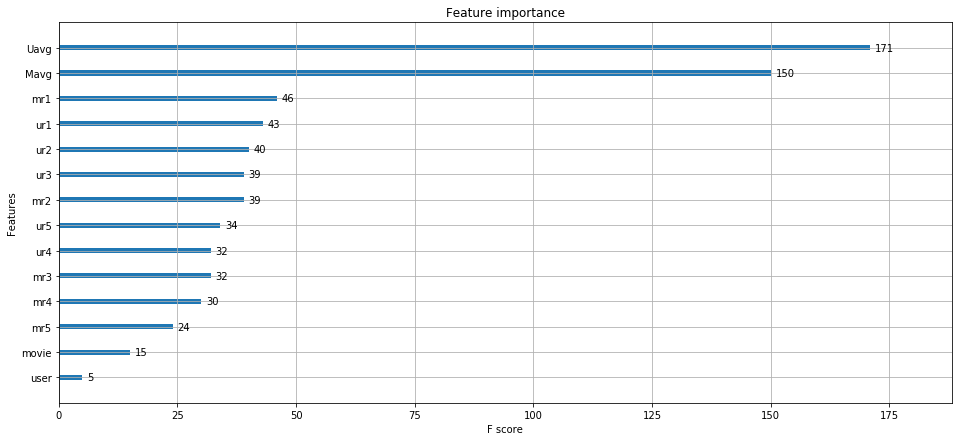

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 7))

xgb.plot_importance( xg, ax=ax )
plt.show()

In [4]:
from surprise import Reader, Dataset
# pip3 install scikit-surprise

Surprise is a Python scikit building and analyzing recommender systems.

The name SurPRISE (roughly :) ) stands for Simple Python RecommendatIon System Engine.

    -- We can't give raw data (movie, user, rating) to train the model in Surprise library.
    -- They have a saperate format for TRAIN and TEST data, which will be useful for training the models like SVD,    '
         KNNBaseLineOnly....etc..,in Surprise.
    -- We can form the trainset from a file, or from a Pandas DataFrame.
  
To load a dataset from a pandas dataframe, you will need the load_from_df() method.<br> You will also need a Reader object, but only the rating_scale parameter must be specified.<br> The dataframe must have three columns, corresponding to the user (raw) ids, the item (raw) ids, and the ratings in this order. Each row thus corresponds to a given rating. This is not restrictive as you can reorder the columns of your dataframe easily.

<i> Ref : https://surprise.readthedocs.io/en/stable/getting_started.html#load-dom-dataframe-py

In [5]:
reader = Reader(rating_scale=(1,5))

# Creating Train data 
trData = Dataset.load_from_df( xtrain[['user', 'movie', 'rating']], reader ) 

# Build the trainset from traindata.., It is of dataset format from surprise library..
trainSet = trData.build_full_trainset() 

In [6]:
print( trData )
print( trainSet )

In [7]:
# Testset is just a list of (user, movie, rating) tuples. (Order in the tuple is impotant)
testSet = list( zip( xtest.user.values, xtest.movie.values, xtest.rating.values ) )
testSet[:3]

[(518079, 4501, 1), (1255155, 4501, 2), (1436160, 4501, 2)]

In [8]:
from datetime import datetime

### Surprise Baseline 
Algorithm predicting the baseline estimate for given user and item.



<b> Predicted_rating : ( baseline prediction ) </b>

 >$   \large {\hat{r}_{ui} = b_{ui} =\mu + b_u + b_i} $


- $\pmb \mu $ : Average of all trainings in training data.
- $\pmb b_u$ : User bias
- $\pmb b_i$ : Item bias (movie biases) 


<b>Optimization function ( Least Squares Problem )</b>


> $ \large \sum_{r_{ui} \in R_{train}} \left(r_{ui} - (\mu + b_u + b_i)\right)^2 +
\lambda \left(b_u^2 + b_i^2 \right).\text {        [mimimize } {b_u, b_i]}$ 
    
<i> Ref : http://surprise.readthedocs.io/en/stable/basic_algorithms.html#surprise.prediction_algorithms.baseline_only.BaselineOnly 

Ref : http://surprise.readthedocs.io/en/stable/prediction_algorithms.html#baselines-estimates-configuration 


In [9]:
from surprise import BaselineOnly 
import numpy as np

# option specify, how to compute those user and item biases
option = { 'method': 'sgd', 'learning_rate': .001 }

baseline = BaselineOnly( bsl_options = option )

start = datetime.now()

baseline.fit(trainSet)

# bsl_options (dict) – A dictionary of options for the baseline estimates computation.

Estimating biases using sgd...


In [10]:
train = dict()
test = dict()

In [11]:
# Evaluating train data --------------------------------------------------------

# Getting Train Predictions (list of prediction class inside Surprise)
trPred = baseline.test( trainSet.build_testset() )

# Getting Predicted ratings form Train Predictions
trActualR = np.array([pred.r_ui for pred in trPred])
trPredR = np.array([pred.est for pred in trPred])

# Calculating RMSE and MAPE
trrmse = np.sqrt( np.mean(( trPredR - trActualR )**2 ) )
trmape = np.mean( np.abs( trPredR - trActualR ) / trActualR ) * 100

train['rmse'] = trrmse
train['mape'] = trmape
train['predictions'] = trPredR

print(' Train RMSE : ', trrmse, ' MAPE : ', trmape)

# Evaluating Test data ---------------------------------------------------------

# Getting Test Predictions (list of prediction class of test data )
tePred = baseline.test( testSet )

# Getting Predicted ratings form list of Predictions
teActualR = np.array( [ pred.r_ui for pred in tePred ])
tePredR = np.array( [ pred.est for pred in tePred ])

# Calculating RMSE and MAPE
termse = np.sqrt( np.mean(( tePredR - teActualR )**2 ) )
temape = np.mean( np.abs( tePredR - teActualR ) / teActualR ) * 100

test['rmse'] = termse
test['mape'] = temape
test['predictions'] = tePredR

print(' Test RMSE : ', termse, ' MAPE : ', temape)

print('\n Time Taken : ', datetime.now() - start )

 Train RMSE :  0.927338816934701  MAPE :  29.039347590891612
 Test RMSE :  1.0773974064884757  MAPE :  34.08602284148823

 Time Taken :  0:00:13.214723


In [12]:
train['predictions']

array([3.17054284, 3.19283447, 3.62998471, ..., 3.91712823, 2.71384854,
       2.71386777])

In [13]:
# Adding Baseline Predicted ratoings as feature in Train data

xtrain['BaselinePred'] = train['predictions']

xtrain.head(3)

,user,movie,Gavg,ur1,ur2,ur3,ur4,ur5,mr1,mr2,mr3,mr4,mr5,Uavg,Mavg,rating,BaselinePred
0,1248029,1,3.55972,3.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,5.0,3.0,3.254777,3.000000,3,3.170543
1,209104,4501,3.55972,4.0,3.0,2.0,1.0,1.0,2.0,3.0,5.0,5.0,5.0,4.612903,2.904762,2,3.192834
2,343411,4501,3.55972,1.0,4.0,5.0,4.0,1.0,5.0,5.0,5.0,3.0,5.0,4.625000,2.904762,5,3.629985


In [14]:
# Adding Baseline Predicted ratoings as feature in Test data

xtest['BaselinePred'] = test['predictions']

xtest.head(3)

,user,movie,Gavg,ur1,ur2,ur3,ur4,ur5,mr1,mr2,mr3,mr4,mr5,Uavg,Mavg,rating,BaselinePred
0,518079,4501,3.55972,3.0,3.0,4.0,1.0,1.0,3.55972,3.55972,3.55972,3.55972,3.55972,3.55972,2.904762,1,3.392149
1,1255155,4501,3.55972,3.0,3.0,4.0,1.0,1.0,3.55972,3.55972,3.55972,3.55972,3.55972,3.55972,2.904762,2,3.392149
2,1436160,4501,3.55972,3.0,3.0,4.0,1.0,1.0,3.55972,3.55972,3.55972,3.55972,3.55972,3.55972,2.904762,2,3.392149


In [15]:
# Splitting Train in Train and CV for Hypeparameter Tuning

xtr = xtrain.iloc[ : int( xtrain.shape[0]*0.80 ) ]
xcv = xtrain.iloc[ int( xtrain.shape[0]*0.80 ) :  ]

ytr = xtr['rating']
ycv = xcv['rating']

xtr.drop( ['rating'], axis = 1, inplace = True )
xcv.drop( ['rating'], axis = 1, inplace = True )

print( xtr.shape )
print( xcv.shape )

(307965, 16)
(76992, 16)


/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [16]:
ytrain = xtrain['rating']
ytest = xtest['rating']

Xtrain = xtrain.drop( ['rating'], axis = 1 )
Xtest = xtest.drop( ['rating'], axis = 1 )

### XG Boost with Baseline Prediction as a feature

In [19]:
import xgboost as xgb

def xg(xtr, ytr, xcv, ycv):

    depth = [ 3, 6, 11 ]
    estimator = [ 50, 100, 200, 400, 600 ]

    for i in depth:
        for j in estimator:

            xg = xgb.XGBRegressor( max_depth = i, n_estimators = j, objective = 'reg:squarederror', nthread=4 )
            xg.fit( xtr, ytr )

            ytrpred = xg.predict(xtr)
            trmse, _ = MSE( ytr.values, ytrpred )

            ycvpred = xg.predict(xcv)
            cvmse, _ = MSE( ycv.values, ycvpred )

            print('For max_depth = ',i,' and n_estimators = ',j,' RMSE Train : ',trmse, ' and RMSE CV : ',cvmse )

In [19]:
xg( xtr, ytr, xcv, ycv )

For max_depth =  3  and n_estimators =  50  RMSE Train :  0.8655590392826505  and RMSE CV :  0.8615866037155404
For max_depth =  3  and n_estimators =  100  RMSE Train :  0.8605557535355195  and RMSE CV :  0.8577222922194516
For max_depth =  3  and n_estimators =  200  RMSE Train :  0.8582090483197052  and RMSE CV :  0.8582373510581508
For max_depth =  3  and n_estimators =  400  RMSE Train :  0.8555469757323785  and RMSE CV :  0.8666894833284086
For max_depth =  3  and n_estimators =  600  RMSE Train :  0.8533387070780282  and RMSE CV :  0.8673117123590017
For max_depth =  6  and n_estimators =  50  RMSE Train :  0.8531891761825683  and RMSE CV :  0.8569812289972188
For max_depth =  6  and n_estimators =  100  RMSE Train :  0.8465016179620632  and RMSE CV :  0.8580217983197156
For max_depth =  6  and n_estimators =  200  RMSE Train :  0.838178949383096  and RMSE CV :  0.8682500840065843
For max_depth =  6  and n_estimators =  400  RMSE Train :  0.8245606129035709  and RMSE CV :  0.875

In [24]:
D = 3
N = 100

xg = xgb.XGBRegressor( max_depth = D, n_estimators = N, objective = 'reg:squarederror', nthread=4 )
xg.fit( Xtrain, ytrain )

ytrpred = xg.predict(Xtrain)
ytepred = xg.predict(Xtest)

rmsetr, mapetr = MSE( ytrain, ytrpred )
rmsete, mapete = MSE( ytest, ytepred )
print(' Train RMSE : ',rmsetr , ' MAPE : ',mapetr  )
print(' Test RMSE : ',rmsete , ' MAPE : ',mapete  )

 Train RMSE :  0.8597361720200826  MAPE :  25.903243112822093
 Test RMSE :  1.0984120479548696  MAPE :  33.51931264259599


In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 7))

xgb.plot_importance( xg, ax=ax )
plt.show()

In [31]:
def surprise( model ):
    
    train = dict()
    test = dict()
    
    start = datetime.now()

# Evaluating train data --------------------------------------------------------

    # Getting Train Predictions (list of prediction class inside Surprise)
    trPred = model.test( trainSet.build_testset() )

    # Getting Predicted ratings form Train Predictions
    trActualR = np.array([pred.r_ui for pred in trPred])
    trPredR = np.array([pred.est for pred in trPred])

    # Calculating RMSE and MAPE
    trrmse = np.sqrt( np.mean(( trPredR - trActualR )**2 ) )
    trmape = np.mean( np.abs( trPredR - trActualR ) / trActualR ) * 100

    train['rmse'] = trrmse
    train['mape'] = trmape
    train['predictions'] = trPredR

    print(' Train RMSE : ', trrmse, ' MAPE : ', trmape)

# Evaluating Test data ---------------------------------------------------------

    # Getting Test Predictions (list of prediction class of test data )
    tePred = model.test( testSet )

    # Getting Predicted ratings form list of Predictions
    teActualR = np.array( [ pred.r_ui for pred in tePred ])
    tePredR = np.array( [ pred.est for pred in tePred ])

    # Calculating RMSE and MAPE
    termse = np.sqrt( np.mean(( tePredR - teActualR )**2 ) )
    temape = np.mean( np.abs( tePredR - teActualR ) / teActualR ) * 100

    test['rmse'] = termse
    test['mape'] = temape
    test['predictions'] = tePredR

    print(' Test RMSE : ', termse, ' MAPE : ', temape)

    print('\n Time Taken : ', datetime.now() - start )
    
    return train, test

### Surprise KNN

 __predicted Rating__ : ( ___ based on User-User similarity ___ )

\begin{align} \hat{r}_{ui} = b_{ui} + \frac{ \sum\limits_{v \in N^k_i(u)}
\text{sim}(u, v) \cdot (r_{vi} - b_{vi})} {\sum\limits_{v \in
N^k_i(u)} \text{sim}(u, v)} \end{align}

- $\pmb{b_{ui}}$ -  _Baseline prediction_ of (user,movie) rating

- $ \pmb {N_i^k (u)}$ - Set of __K similar__ users (neighbours) of __user (u)__ who rated __movie(i)__  

- _sim (u, v)_ - __Similarity__ between users __u and v__  
    - Generally, it will be cosine similarity or Pearson correlation coefficient. 
    - But we use __shrunk Pearson-baseline correlation coefficient__, which is based on the pearsonBaseline similarity ( we take base line predictions instead of mean rating of user/item)
    
   
<b> Predicted rating ( based on Item Item similarity ) </b> :
 \begin{align} \hat{r}_{ui} = b_{ui} + \frac{ \sum\limits_{j \in N^k_u(i)}\text{sim}(i, j) \cdot (r_{uj} - b_{uj})} {\sum\limits_{j \in N^k_u(j)} \text{sim}(i, j)} \end{align}


Depending on the user_based field of the sim_options parameter. For the best predictions, use the pearson_baseline similarity measure.<br>

<i> 
Ref - KNN BASELINE : http://surprise.readthedocs.io/en/stable/knn_inspired.html#surprise.prediction_algorithms.knns.KNNBaseline 
    
Ref- PEARSON_BASELINE SIMILARITY : http://surprise.readthedocs.io/en/stable/similarities.html#surprise.similarities.pearson_baseline 

In [18]:
from surprise import KNNBaseline

# KNNBaseline : A basic collaborative filtering algorithm taking into account a baseline rating.

start = datetime.now()

sOptions = {'user_based' : True, 'name': 'pearson_baseline', 'shrinkage': 100, 'min_support': 2 } 

# min_support : The minimum number of common items (when 'user_based' is 'True') or ....
# .... minimum number of common users (when 'user_based' is 'False') for the similarity not to be zero.

# name : name of the similarity to use, as defined in the similarities module. Default is 'MSD'.

# we keep other parameters like regularization parameter and learning_rate as default values.
bOptions = {'method': 'sgd'} 

knn = KNNBaseline( k = 40, sim_options = sOptions, bsl_options = bOptions)

knn.fit( trainSet )

print(' Time Taken : ', datetime.now() - start )

# k : The (max) number of neighbors to take into account for aggregation
# sim_options : A dict of options for the similarity measure. It is recommended to use the pearson_baseline similarity measure.
# bsl_options : A dictionary of options for the baseline estimates computation

# Takes some time to run

Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
 Time Taken :  0:02:23.672717


In [20]:
resTrain, resTest = surprise( knn )

 Train RMSE :  0.4000688170413332  MAPE :  11.204348773981348
 Test RMSE :  1.0765210346857448  MAPE :  33.82366298866851

 Time Taken :  0:07:16.729039


In [21]:
# Adding Baseline Predicted ratoings as feature in Train data

xtrain['KnnUserPred'] = resTrain['predictions']

xtest['KnnUserPred'] = resTest['predictions']

xtrain.head(3)

,user,movie,Gavg,ur1,ur2,ur3,ur4,ur5,mr1,mr2,mr3,mr4,mr5,Uavg,Mavg,rating,BaselinePred,KnnUserPred
0,1248029,1,3.55972,3.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,5.0,3.0,3.254777,3.000000,3,3.170543,3.000000
1,209104,4501,3.55972,4.0,3.0,2.0,1.0,1.0,2.0,3.0,5.0,5.0,5.0,4.612903,2.904762,2,3.192834,3.060451
2,343411,4501,3.55972,1.0,4.0,5.0,4.0,1.0,5.0,5.0,5.0,3.0,5.0,4.625000,2.904762,5,3.629985,3.601217


In [22]:
sOptions = {'user_based' : False, 'name': 'pearson_baseline', 'shrinkage': 100, 'min_support': 2 } 
#'user_based' : False => this considers the similarities of movies instead of users

# we keep other parameters like regularization parameter and learning_rate as default values.
bOptions = {'method': 'sgd'} 

knn = KNNBaseline( k = 40, sim_options = sOptions, bsl_options = bOptions)

knn.fit( trainSet )

# k : The (max) number of neighbors to take into account for aggregation
# sim_options : A dict of options for the similarity measure. It is recommended to use the pearson_baseline similarity measure.
# bsl_options : A dictionary of options for the baseline estimates computation

Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [23]:
resTrain, resTest = surprise( knn )

 Train RMSE :  0.4329028853879273  MAPE :  11.920310264768439
 Test RMSE :  1.076595039284624  MAPE :  33.81056129103451

 Time Taken :  0:00:47.485251


In [24]:
xtrain['KnnMoviePred'] = resTrain['predictions']

xtest['KnnMoviePred'] = resTest['predictions']

xtrain.head(3)

,user,movie,Gavg,ur1,ur2,ur3,ur4,ur5,mr1,mr2,mr3,mr4,mr5,Uavg,Mavg,rating,BaselinePred,KnnUserPred,KnnMoviePred
0,1248029,1,3.55972,3.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,5.0,3.0,3.254777,3.000000,3,3.170543,3.000000,3.000000
1,209104,4501,3.55972,4.0,3.0,2.0,1.0,1.0,2.0,3.0,5.0,5.0,5.0,4.612903,2.904762,2,3.192834,3.060451,3.076287
2,343411,4501,3.55972,1.0,4.0,5.0,4.0,1.0,5.0,5.0,5.0,3.0,5.0,4.625000,2.904762,5,3.629985,3.601217,3.787502


### XG Boost with Surprise KNN pred. as Features

In [27]:
# Splitting Train in Train and CV for Hypeparameter Tuning

xtr = xtrain.iloc[ : int( xtrain.shape[0]*0.80 ) ]
xcv = xtrain.iloc[ int( xtrain.shape[0]*0.80 ) :  ]

ytr = xtr['rating']
ycv = xcv['rating']

xtr.drop( ['rating'], axis = 1, inplace = True )
xcv.drop( ['rating'], axis = 1, inplace = True )

print( xtr.shape )
print( xcv.shape )

/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(307965, 18)
(76992, 18)


In [28]:
ytrain = xtrain['rating']
ytest = xtest['rating']

Xtrain = xtrain.drop( ['rating'], axis = 1 )
Xtest = xtest.drop( ['rating'], axis = 1 )

In [56]:
xg( xtr, ytr, xcv, ycv )

For max_depth =  3  and n_estimators =  50  RMSE Train :  0.8655590392826505  and RMSE CV :  0.8615866037155404
For max_depth =  3  and n_estimators =  100  RMSE Train :  0.8605362496463816  and RMSE CV :  0.8577863775192418
For max_depth =  3  and n_estimators =  200  RMSE Train :  0.8582693165621949  and RMSE CV :  0.8579829630343163
For max_depth =  3  and n_estimators =  400  RMSE Train :  0.8556383136172531  and RMSE CV :  0.8641370667325444
For max_depth =  3  and n_estimators =  600  RMSE Train :  0.8533894677379137  and RMSE CV :  0.8663480868683655
For max_depth =  3  and n_estimators =  600  RMSE Train :  0.8533894677379137  and RMSE CV :  0.8663480868683655
For max_depth =  6  and n_estimators =  50  RMSE Train :  0.8529061298148222  and RMSE CV :  0.8565398235059913
For max_depth =  6  and n_estimators =  100  RMSE Train :  0.8463129331077253  and RMSE CV :  0.8579161925281162
For max_depth =  6  and n_estimators =  200  RMSE Train :  0.8375999420160181  and RMSE CV :  0.86

In [32]:
D = 3
N = 100

xg = xgb.XGBRegressor( max_depth = D, n_estimators = N, objective = 'reg:squarederror', nthread=4 )
xg.fit( Xtrain, ytrain )

ytrpred = xg.predict(Xtrain)
ytepred = xg.predict(Xtest)

rmsetr, mapetr = MSE( ytrain, ytrpred )
rmsete, mapete = MSE( ytest, ytepred )
print(' Train RMSE : ',rmsetr , ' MAPE : ',mapetr  )
print(' Test RMSE : ',rmsete , ' MAPE : ',mapete  )

 Train RMSE :  0.8597361720200826  MAPE :  25.903243112822093
 Test RMSE :  1.0984120479548696  MAPE :  33.51931264259599


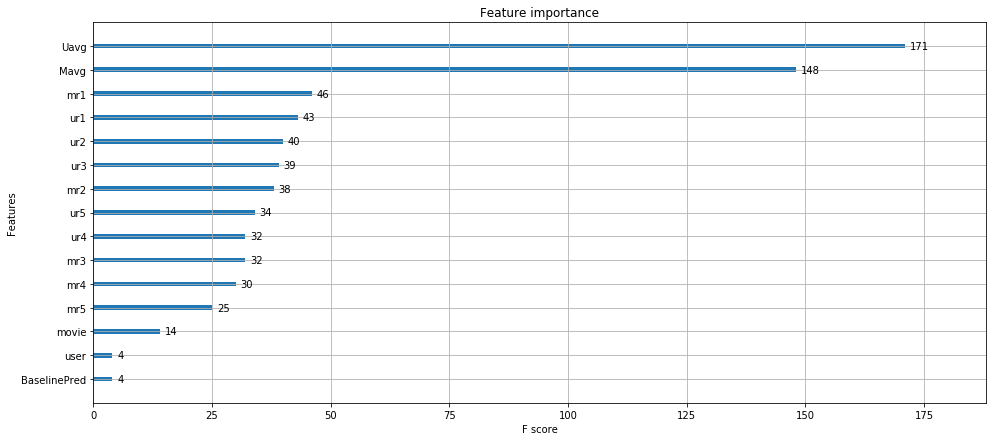

In [34]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 7))

xgb.plot_importance( xg, ax=ax )
plt.show()

### Surprise SVD

<b>Predicted Rating : </b>
- $ \large  \hat r_{ui} = \mu + b_u + b_i + q_i^Tp_u $

    - $\pmb q_i$ - Representation of item(movie) in latent factor space

    - $\pmb p_u$ - Representation of user in new latent factor space
    
If user u is unknown, then the bias bu and the factors pu are assumed to be zero. The same applies for item i with bi and qi.
<br>
        
<b>Optimization problem with user item interactions and regularization (to avoid overfitting) : </b> 
- $\large \sum_{r_{ui} \in R_{train}} \left(r_{ui} - \hat{r}_{ui} \right)^2 +
\lambda\left(b_i^2 + b_u^2 + ||q_i||^2 + ||p_u||^2\right) $

<br>

<i> Ref : http://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD

In [27]:
from surprise import SVD


svd = SVD( n_factors=100, biased=True, random_state=15 )
svd.fit( trainSet)

print(' Time Taken : ', datetime.now() - start )

# biased (bool) : Whether to use baselines (or biases). Default is True.
# n_factors : The number of factors. Default is 100.

 Time Taken :  0:00:22.848634


In [32]:
start = datetime.now()

svdResTr, svdResTe = surprise( svd )

print(' Time Taken : ', datetime.now() - start )

 Train RMSE :  0.6632126681223717  MAPE :  19.986400252223216
 Test RMSE :  1.0762971216639818  MAPE :  33.82486197008395

 Time Taken :  0:00:04.140590
 Time Taken :  0:00:04.238810


In [41]:
xtrain['svdPred'] = svdResTr['predictions']

xtest['svdPred'] = svdResTe['predictions']

xtrain.head(3)

,user,movie,Gavg,ur1,ur2,ur3,ur4,ur5,mr1,mr2,mr3,mr4,mr5,Uavg,Mavg,rating,BaselinePred,KnnUserPred,KnnMoviePred,svdPred
0,1248029,1,3.55972,3.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,5.0,3.0,3.254777,3.000000,3,3.170543,3.000000,3.000000,3.124346
1,209104,4501,3.55972,4.0,3.0,2.0,1.0,1.0,2.0,3.0,5.0,5.0,5.0,4.612903,2.904762,2,3.192834,3.060451,3.076287,3.075074
2,343411,4501,3.55972,1.0,4.0,5.0,4.0,1.0,5.0,5.0,5.0,3.0,5.0,4.625000,2.904762,5,3.629985,3.601217,3.787502,4.115281


In [42]:
# Splitting Train in Train and CV for Hypeparameter Tuning

xtr = xtrain.iloc[ : int( xtrain.shape[0]*0.80 ) ]
xcv = xtrain.iloc[ int( xtrain.shape[0]*0.80 ) :  ]

ytr = xtr['rating']
ycv = xcv['rating']

xtr.drop( ['rating'], axis = 1, inplace = True )
xcv.drop( ['rating'], axis = 1, inplace = True )

print( xtr.shape )
print( xcv.shape )

(307965, 19)
(76992, 19)


In [43]:
ytrain = xtrain['rating']
ytest = xtest['rating']

Xtrain = xtrain.drop( ['rating'], axis = 1 )
Xtest = xtest.drop( ['rating'], axis = 1 )

In [36]:
xg( xtr, ytr, xcv, ycv )

/home/harsh_dhaundiyal/.local/lib/python3.5/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/harsh_dhaundiyal/.local/lib/python3.5/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


For max_depth =  3  and n_estimators =  50  RMSE Train :  0.8655590392826505  and RMSE CV :  0.8615866037155404
For max_depth =  3  and n_estimators =  100  RMSE Train :  0.8605354605154261  and RMSE CV :  0.85778736161409
For max_depth =  3  and n_estimators =  200  RMSE Train :  0.8582420890285878  and RMSE CV :  0.8576889349226963
For max_depth =  3  and n_estimators =  400  RMSE Train :  0.8554786039465487  and RMSE CV :  0.8629677891974711
For max_depth =  3  and n_estimators =  600  RMSE Train :  0.8532028709943469  and RMSE CV :  0.8647938709370622
For max_depth =  6  and n_estimators =  50  RMSE Train :  0.8530493429852105  and RMSE CV :  0.8568691952702846
For max_depth =  6  and n_estimators =  100  RMSE Train :  0.8460255003663014  and RMSE CV :  0.858655018536406
For max_depth =  6  and n_estimators =  200  RMSE Train :  0.8380827471864871  and RMSE CV :  0.8690356441030012
For max_depth =  6  and n_estimators =  400  RMSE Train :  0.8236614227641917  and RMSE CV :  0.87624

In [48]:
D = 3
N = 100

xg = xgb.XGBRegressor( max_depth = D, n_estimators = N, objective = 'reg:squarederror', nthread=4 )
xg.fit( Xtrain, ytrain )

ytrpred = xg.predict(Xtrain)
ytepred = xg.predict(Xtest)

rmsetr, mapetr = MSE( ytrain, ytrpred )
rmsete, mapete = MSE( ytest, ytepred )
print(' Train RMSE : ',rmsetr , ' MAPE : ',mapetr  )
print(' Test RMSE : ',rmsete , ' MAPE : ',mapete  )

 Train RMSE :  0.8597354394738574  MAPE :  25.90321694178337
 Test RMSE :  1.098412070096075  MAPE :  33.51931322452183


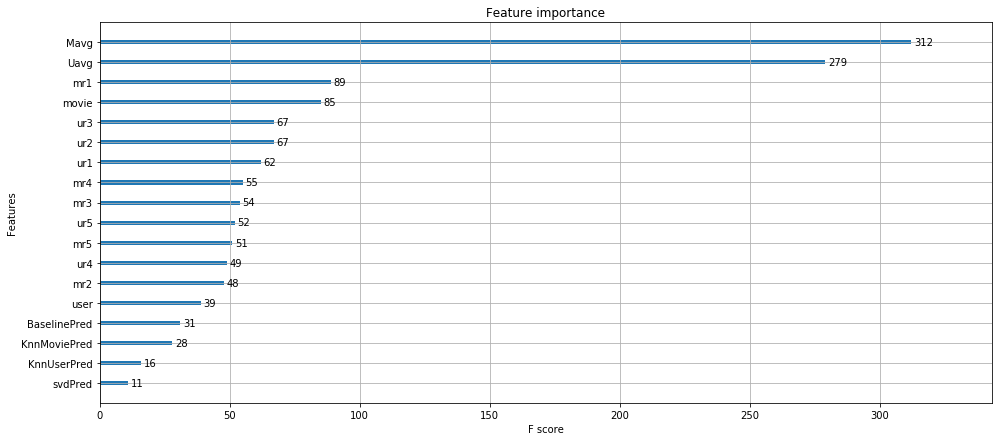

In [47]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 7))

xgb.plot_importance( xg, ax=ax )
plt.show()

### XG Boost with only Predicted values from Surprise

In [50]:
Xtrain = xtrain.drop(['user', 'movie', 'Gavg', 'ur1', 'ur2', 'ur3', 'ur4', 'ur5', 'mr1',
       'mr2', 'mr3', 'mr4', 'mr5', 'Uavg', 'Mavg', 'rating'], axis =1)

Xtest = xtest.drop(['user', 'movie', 'Gavg', 'ur1', 'ur2', 'ur3', 'ur4', 'ur5', 'mr1',
       'mr2', 'mr3', 'mr4', 'mr5', 'Uavg', 'Mavg', 'rating'], axis =1)

Xtrain.head(3)

,BaselinePred,KnnUserPred,KnnMoviePred,svdPred
0,3.170543,3.000000,3.000000,3.124346
1,3.192834,3.060451,3.076287,3.075074
2,3.629985,3.601217,3.787502,4.115281


In [54]:
D = 3
N = 100

xg = xgb.XGBRegressor( max_depth = D, n_estimators = N, objective = 'reg:squarederror', nthread=4 )
xg.fit( Xtrain, ytrain )

ytrpred = xg.predict(Xtrain)
ytepred = xg.predict(Xtest)

rmsetr, mapetr = MSE( ytrain, ytrpred )
rmsete, mapete = MSE( ytest, ytepred )
print(' Train RMSE : ',rmsetr , ' MAPE : ',mapetr  )
print(' Test RMSE : ',rmsete , ' MAPE : ',mapete  )

 Train RMSE :  1.0819022859533223  MAPE :  35.88347427161073
 Test RMSE :  1.111868111502914  MAPE :  35.49356622541468


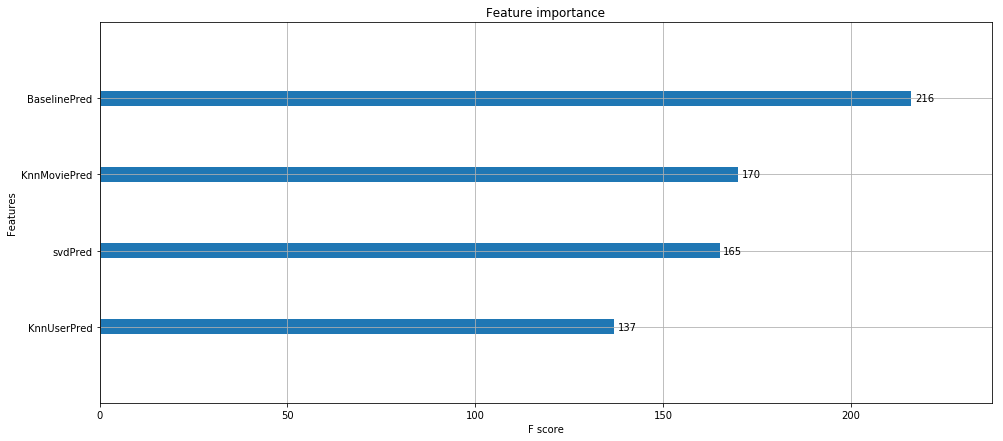

In [55]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 7))

xgb.plot_importance( xg, ax=ax )
plt.show()

In [23]:
from prettytable import PrettyTable
    
x = PrettyTable()


x.field_names = [" Model ", " Test RMSE ", " Test MAPE ", " Train RMSE"]

x.add_row( [ " XGBoost with initial features ", " 1.0984 ", " 33.5208 ", " 0.8597 " ] ) 
x.add_row(["","","",""])
x.add_row( [ " Surprise Baseline ", " 1.0773 ", " 34.0860 ", " 0.9273 " ] )
x.add_row( [ " XGBoost with Baseline pred. feature ", " 1.0984 ", " 33.5193 ", " 0.8597 " ] ) 
x.add_row(["","","", ""])
x.add_row( [ " Surprise Baseline KNN ", " 1.0765 ", " 33.8105 ", " 0.4329 " ] )
x.add_row( [ " XGBoost with Baseline KNN pred. feature ", " 1.0984 ", " 33.5193 ", " 0.8597 " ] ) 
x.add_row(["","","", ""])
x.add_row( [ " Surprise SVD ", " 1.0762 ", " 33.8248 ", " 0.6632 " ] ) 
x.add_row( [ " XGBoost with SVD pred. feature ", " 1.0984 ", " 33.5193 ", " 0.8597 " ] ) 
x.add_row(["","","", ""])
x.add_row( [ " XGBoost with only Surprise pred. feature ", " 1.1118 ", " 35.4935 ", " 1.0819 " ] ) 

print( x )

# Ref : http://zetcode.com/python/prettytable/

+--------------------------------------------+-------------+-------------+-------------+
|                   Model                    |  Test RMSE  |  Test MAPE  |  Train RMSE |
+--------------------------------------------+-------------+-------------+-------------+
|       XGBoost with initial features        |    1.0984   |   33.5208   |    0.8597   |
|                                            |             |             |             |
|             Surprise Baseline              |    1.0773   |   34.0860   |    0.9273   |
|    XGBoost with Baseline pred. feature     |    1.0984   |   33.5193   |    0.8597   |
|                                            |             |             |             |
|           Surprise Baseline KNN            |    1.0765   |   33.8105   |    0.4329   |
|  XGBoost with Baseline KNN pred. feature   |    1.0984   |   33.5193   |    0.8597   |
|                                            |             |             |             |
|                Surp

Out of all models Surprise SVD has the lowest Test RMSE and 2nd lowest Train RMSE

Surprise Models have a better performance than XG Boost models